In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
gdp=pd.read_csv('./GDP.csv')

In [3]:
gdp.head()

,DATE,GDP,UNEPR,Temp
0,1948/1/1,265.742,0.435333,-4.414
1,1948/4/1,272.567,0.433667,9.114
2,1948/7/1,279.196,0.432333,21.058
3,1948/10/1,280.366,0.434000,9.214
4,1949/1/1,275.034,0.438667,-5.259


In [4]:
gdp['DATE']=pd.to_datetime(gdp['DATE'])
gdp=gdp.set_index('DATE')
#gdp['GDPR']=(gdp['GDP'].shift(-1)-gdp['GDP'])/gdp['GDP']
gdp.dropna(inplace=True)
gdp.head()

,GDP,UNEPR,Temp
DATE,,,
1948-01-01,265.742,0.435333,-4.414
1948-04-01,272.567,0.433667,9.114
1948-07-01,279.196,0.432333,21.058
1948-10-01,280.366,0.434000,9.214
1949-01-01,275.034,0.438667,-5.259


In [7]:
gdp.head()

,GDP,UNEPR,Temp
DATE,,,
1948-01-01,265.742,0.435333,-4.414
1948-04-01,272.567,0.433667,9.114
1948-07-01,279.196,0.432333,21.058
1948-10-01,280.366,0.434000,9.214
1949-01-01,275.034,0.438667,-5.259


In [8]:
import matplotlib.pyplot as plt
import matplotlib

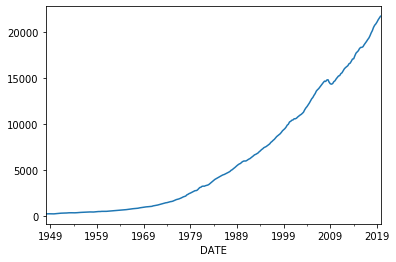

In [10]:
gdp['GDP'].plot()

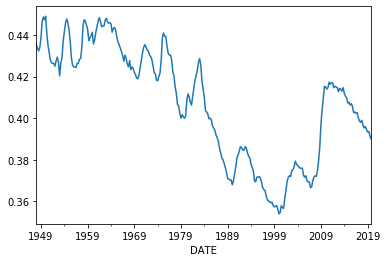

In [11]:
gdp['UNEPR'].plot()

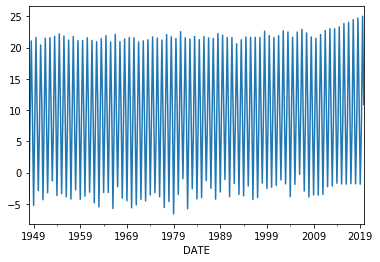

In [12]:
gdp['Temp'].plot()

In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [26]:
x_set=gdp[['UNEPR','Temp']]
x_set.head()

,UNEPR,Temp
DATE,,
1948-01-01,0.435333,-4.414
1948-04-01,0.433667,9.114
1948-07-01,0.432333,21.058
1948-10-01,0.434000,9.214
1949-01-01,0.438667,-5.259


In [27]:
x_train = x_set['1948-01':'1998-10']
y_train = gdp['GDP']['1948-01':'1998-10']
x_test = x_set['1999-01':'2019-10']
y_test = gdp['GDP']['1999-01':'2019-10']

In [28]:
model1 = sm.OLS(y_train,x_train).fit()

In [29]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    GDP   R-squared (uncentered):                   0.459
Model:                            OLS   Adj. R-squared (uncentered):              0.453
Method:                 Least Squares   F-statistic:                              85.63
Date:                Tue, 11 Aug 2020   Prob (F-statistic):                    1.16e-27
Time:                        19:58:04   Log-Likelihood:                         -1905.6
No. Observations:                 204   AIC:                                      3815.
Df Residuals:                     202   BIC:                                      3822.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
UNEPR       5497.3717    655.139      8.391      0.000    4205.584    6789.159
Temp          27.1881     21.519      1.263      0.208     -15.242      69.618
==============================================================================
Omnibus:                       25.846   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.573
Skew:                           0.941   Prob(JB):                     1.39e-07
Kurtosis:                       2.586   Cond. No.                         42.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
y_pred = model1.predict(x_test)

In [31]:
rmse = np.sqrt(((y_pred-y_test)**2).mean())

In [32]:
rmse

13026.571772717794

In [33]:
model2 = sm.GLM(y_train, x_train,family=sm.families.Gamma())

/Users/tamsin/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:273: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


In [34]:
model2= model2.fit()

In [35]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    GDP   No. Observations:                  204
Model:                            GLM   Df Residuals:                      202
Model Family:                   Gamma   Df Model:                            1
Link Function:          inverse_power   Scale:                         0.84308
Method:                          IRLS   Log-Likelihood:                -1801.3
Date:                Tue, 11 Aug 2020   Deviance:                       201.44
Time:                        19:58:20   Pearson chi2:                     170.
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
UNEPR          0.0010   9.34e-05     11.102      0.000       0.001       0.001
Temp       -3.652e-06    2.8e-06     -1.305      0.192   -9.14e-06    1.83e-06
==============================================================================
"""

In [36]:
y_pred=model2.predict(x_test)

In [37]:
rmse = np.sqrt(((y_pred-y_test)**2).mean())
rmse

12741.952530144581

In [38]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [39]:
import xgboost as xgb

In [40]:
# fit model no training data
model3 = XGBClassifier()
model3.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
y_pred=model3.predict(x_test)

In [44]:
rmse = np.sqrt(((y_pred-y_test)**2).mean())
rmse

15123.82685238996